<a href="https://colab.research.google.com/github/smnizza/machine-learning-guide/blob/main/USL_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA) – Reduksi Dimensi Data

Principal Component Analysis (PCA) adalah metode statistik untuk **mereduksi dimensi** data dengan mempertahankan sebanyak mungkin informasi.

## Mengapa PCA Diperlukan?
- Dataset dengan banyak fitur bisa **sulit divisualisasikan** dan **berisiko overfitting**.
- PCA mengubah data ke **dimensi lebih kecil** tetapi tetap mempertahankan **variasi data yang signifikan**.

## Bagaimana PCA Bekerja?
1. **Standardisasi Data** agar memiliki skala yang sebanding.
2. **Menghitung Kovarian** antara fitur untuk memahami hubungan antar variabel.
3. **Mendapatkan Principal Components** yang menjelaskan variasi terbesar dalam data.
4. **Menggunakan Komponen Utama** untuk analisis atau visualisasi.

## Implementasi PCA dalam Python
Kita akan menggunakan dataset **Iris** untuk mengurangi dimensi dari 4 fitur menjadi 2D.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Normalisasi data agar memiliki skala yang seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [2]:
# Menggunakan PCA untuk mereduksi data ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Konversi hasil PCA ke DataFrame untuk visualisasi
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Target"] = y

# Tampilkan persentase varians yang dijelaskan oleh tiap komponen utama
print("Persentase Variansi oleh PC1 dan PC2:", pca.explained_variance_ratio_)

Persentase Variansi oleh PC1 dan PC2: [0.72962445 0.22850762]


## Interpretasi Hasil PCA
- **PC1** dan **PC2** adalah dua komponen utama yang mewakili variasi data.
- **explained_variance_ratio_** menunjukkan **berapa persen informasi** yang dipertahankan dalam PCA.

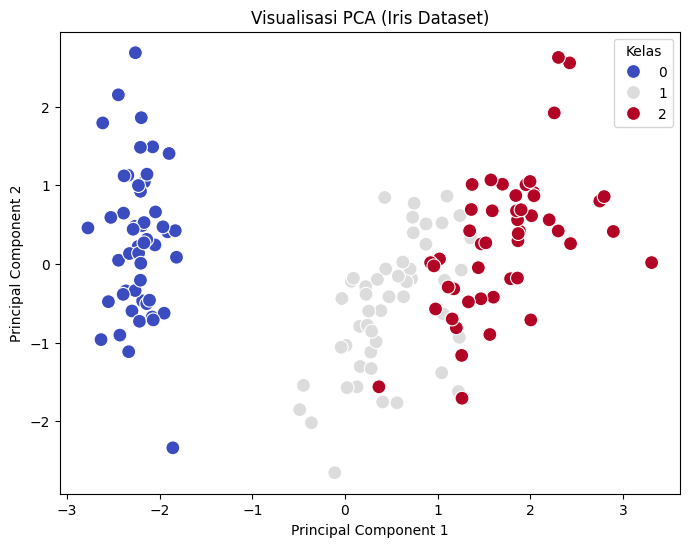

In [3]:
# Plot hasil PCA dalam 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Target"], palette="coolwarm", s=100)
plt.title("Visualisasi PCA (Iris Dataset)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Kelas")
plt.show()

## Menentukan Jumlah Komponen Optimal
Untuk menentukan jumlah komponen optimal, kita bisa melihat **Scree Plot** atau **Cumulative Explained Variance**.

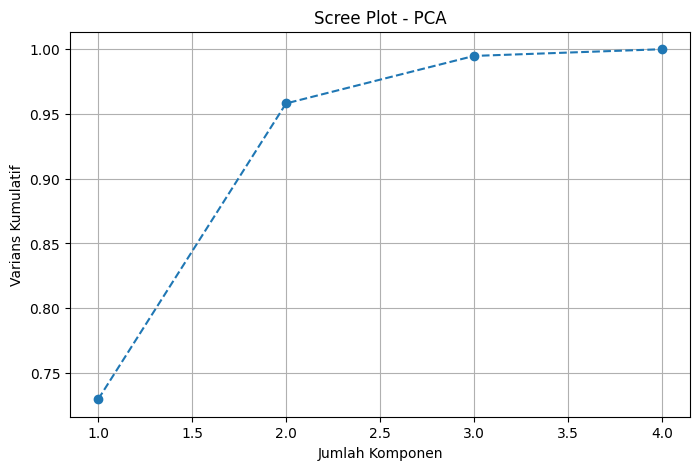

In [4]:
# PCA tanpa batasan jumlah komponen
pca_full = PCA()
pca_full.fit(X_scaled)

# Plot varians kumulatif
plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Varians Kumulatif')
plt.title('Scree Plot - PCA')
plt.grid()
plt.show()

## Kesimpulan
- PCA memungkinkan kita mereduksi dimensi data sambil mempertahankan variasi utama.
- Visualisasi **Scree Plot** membantu menentukan jumlah komponen optimal.
- PCA sering digunakan untuk **reduksi noise**, **visualisasi data**, atau **peningkatan performa model**.

### **Pengembangan Lebih Lanjut**
- **Menggunakan PCA sebelum model machine learning** untuk meningkatkan efisiensi.
- **Mencoba PCA pada dataset yang lebih kompleks**.
- **Membandingkan PCA dengan teknik reduksi dimensi lainnya**, seperti **t-SNE atau LDA**.